In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
from IPython.display import display, clear_output
import time

In [2]:
df = pd.read_csv("large.csv", header=None)
df

,0,1
0,0.077518,0.017018
1,0.892075,0.737351
2,0.034545,0.418465
3,0.491475,0.643941
4,0.000905,0.633602
...,...,...
995,0.847369,0.338414
996,0.971654,0.900917
997,0.164339,0.870318
998,0.492553,0.679674


In [3]:
cities = {i: (row[0], row[1]) for i, row in df.iterrows()}
num_cities = len(cities)

In [4]:
temp = 10000
cooling_rate = 0.001

In [5]:
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

In [6]:
def total_distance(route):
    return sum(distance(cities[route[i]], cities[route[i - 1]]) for i in range(num_cities))

In [7]:
def initial_population(num_individuals, num_cities):
    population = []
    base_route = list(range(num_cities))
    for _ in range(num_individuals):
        random.shuffle(base_route)
        population.append(base_route[:])
    return population

In [8]:
def tournament_selection(population, tournament_size):
    competitors = random.sample(population, tournament_size)
    sorted_competitors = sorted(competitors, key=lambda x: total_distance(x))
    winner = sorted_competitors[0]
    return winner

In [9]:
def recombine(parent1, parent2):
    subset_size = int(len(parent1) / 2)
    subset1 = random.sample(parent1, subset_size)
    subset2 = [city for city in parent2 if city not in subset1]
    child_route = subset1 + subset2
    return child_route

In [10]:
def mutate(route):
    swap_index1, swap_index2 = random.sample(range(len(route)), 2)
    route[swap_index1], route[swap_index2] = route[swap_index2], route[swap_index1]
    return route

In [11]:
def survivor_selection(old_population, offspring, retain_length, random_select_rate=0.05):
    sorted_population = sorted(old_population + offspring, key=total_distance)
    new_population = sorted_population[:retain_length]

    for individual in sorted_population[retain_length:]:
        if random.random() < random_select_rate:
            new_population.append(individual)

    while len(new_population) > len(old_population):
        new_population.pop()

    return new_population

In [12]:
def plot_live_distance_changes(distances):
    plt.figure(figsize=(10, 5))
    plt.plot(distances, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.title('Live Changes in Distance')
    plt.grid(True)
    plt.show()

In [13]:
def plot_live_route(route, title=""):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'ro-')
    plt.plot(x[0], y[0], 'bo')
    plt.title(title + " Distance: " + str(total_distance(route)))
    plt.show()

In [14]:
route = list(cities.keys())
random.shuffle(route)
initial_route = route[:]

In [15]:
def simulated_annealing(route, temp, cooling_rate):
    current_route = route[:]
    best_route = route[:]
    best_distance = total_distance(route)
    current_population = initial_population(5, num_cities)
    
    while temp > 1:
        new_population = []

        for _ in range(len(current_population)):
            parent1 = tournament_selection(current_population, 3)
            parent2 = tournament_selection(current_population, 3)

            if random.random() < 0.5:
                child = recombine(parent1, parent2)
            else:
                child = mutate(parent1)

            current_distance = total_distance(child)

            # Decide whether to accept the new route
            if current_distance < best_distance:
                best_distance = current_distance
                best_route = child
                
                plot_live_route(best_route, "Optimized Route via Simulated Annealing")
                time.sleep(0.1)
                clear_output(wait=True)

            new_population.append(child)

        current_population = survivor_selection(current_population, new_population, len(current_population))
        temp *= (1 - cooling_rate)

    return best_distance

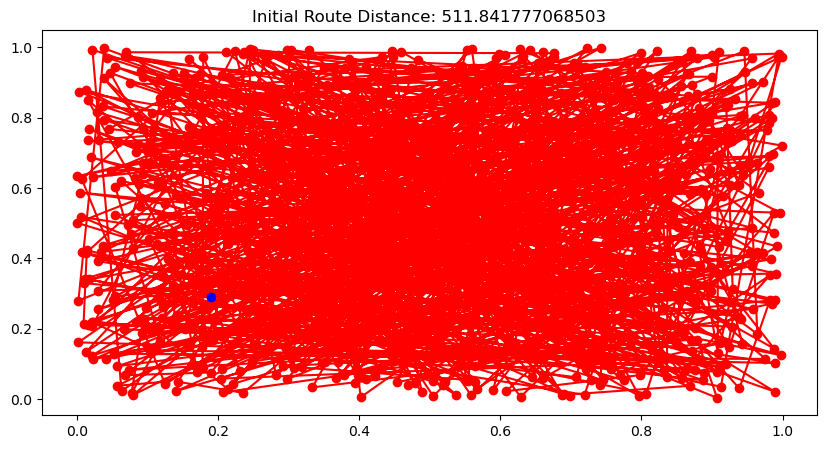

In [16]:
plot_live_route(initial_route, "Initial Route")

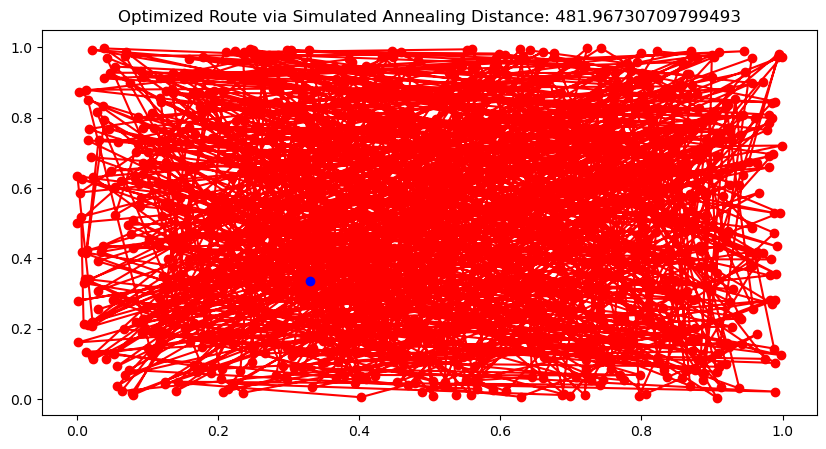

In [17]:
final_route = simulated_annealing(initial_route, temp, cooling_rate)

In [18]:
final_route

481.96730709799493

In [19]:
def calculate_improvement(initial_distance, optimized_distance):
    improvement = (((initial_distance - optimized_distance) / (initial_distance)) * 100)
    return improvement

In [20]:
improvement = calculate_improvement(total_distance(initial_route), final_route)
print(f"Improvement: {improvement:.2f}%")

Improvement: 5.84%
